In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
file_path = r'C:\Users\megha\Downloads\price forecasting\data\raw\time_series_60min_singleindex.csv'
df = pd.read_csv(file_path,parse_dates=['utc_timestamp'], index_col='utc_timestamp')

print("Shape:",df.shape)
print("columns:\n",df.columns)


Shape: (50401, 299)
columns:
 Index(['cet_cest_timestamp', 'AT_load_actual_entsoe_transparency',
       'AT_load_forecast_entsoe_transparency', 'AT_price_day_ahead',
       'AT_solar_generation_actual', 'AT_wind_onshore_generation_actual',
       'BE_load_actual_entsoe_transparency',
       'BE_load_forecast_entsoe_transparency', 'BE_solar_generation_actual',
       'BE_wind_generation_actual',
       ...
       'SI_load_actual_entsoe_transparency',
       'SI_load_forecast_entsoe_transparency', 'SI_solar_generation_actual',
       'SI_wind_onshore_generation_actual',
       'SK_load_actual_entsoe_transparency',
       'SK_load_forecast_entsoe_transparency', 'SK_solar_generation_actual',
       'SK_wind_onshore_generation_actual',
       'UA_load_actual_entsoe_transparency',
       'UA_load_forecast_entsoe_transparency'],
      dtype='object', length=299)


In [22]:
de_cols= [col for col in df.columns if col.startswith('DE_')]
print("Germany columns:",de_cols)


Germany columns: ['DE_load_actual_entsoe_transparency', 'DE_load_forecast_entsoe_transparency', 'DE_solar_capacity', 'DE_solar_generation_actual', 'DE_solar_profile', 'DE_wind_capacity', 'DE_wind_generation_actual', 'DE_wind_profile', 'DE_wind_offshore_capacity', 'DE_wind_offshore_generation_actual', 'DE_wind_offshore_profile', 'DE_wind_onshore_capacity', 'DE_wind_onshore_generation_actual', 'DE_wind_onshore_profile', 'DE_50hertz_load_actual_entsoe_transparency', 'DE_50hertz_load_forecast_entsoe_transparency', 'DE_50hertz_solar_generation_actual', 'DE_50hertz_wind_generation_actual', 'DE_50hertz_wind_offshore_generation_actual', 'DE_50hertz_wind_onshore_generation_actual', 'DE_LU_load_actual_entsoe_transparency', 'DE_LU_load_forecast_entsoe_transparency', 'DE_LU_price_day_ahead', 'DE_LU_solar_generation_actual', 'DE_LU_wind_generation_actual', 'DE_LU_wind_offshore_generation_actual', 'DE_LU_wind_onshore_generation_actual', 'DE_amprion_load_actual_entsoe_transparency', 'DE_amprion_load_

In [23]:
import pandas as pd

# Load your dataset
file_path = r"C:\Users\megha\Downloads\price forecasting\data\raw\time_series_60min_singleindex.csv"
df = pd.read_csv(file_path, parse_dates=['cet_cest_timestamp'], index_col='cet_cest_timestamp')

# Select main columns
df_model = df[[
    'DE_load_actual_entsoe_transparency',     
    'DE_load_forecast_entsoe_transparency',   
    'DE_solar_generation_actual',
    'DE_wind_onshore_generation_actual',
    'DE_solar_profile'
]]

# Rename columns for simplicity
df_model.columns = ['load', 'load_forecast', 'solar', 'wind', 'solar_profile']

# Show shape and first few rows
print(df_model.shape)
print(df_model.head())


(50401, 5)
                              load  load_forecast  solar    wind  \
cet_cest_timestamp                                                 
2015-01-01 00:00:00+01:00      NaN            NaN    NaN     NaN   
2015-01-01 01:00:00+01:00  41151.0        39723.0    NaN  8336.0   
2015-01-01 02:00:00+01:00  40135.0        38813.0    NaN  8540.0   
2015-01-01 03:00:00+01:00  39106.0        38490.0    NaN  8552.0   
2015-01-01 04:00:00+01:00  38765.0        38644.0    NaN  8643.0   

                           solar_profile  
cet_cest_timestamp                        
2015-01-01 00:00:00+01:00            NaN  
2015-01-01 01:00:00+01:00            NaN  
2015-01-01 02:00:00+01:00            NaN  
2015-01-01 03:00:00+01:00            NaN  
2015-01-01 04:00:00+01:00            NaN  


In [24]:
# Count missing values in each column
print(df_model.isna().sum())

# Also check how many total rows will remain after dropping missing
print("\nRows before dropping:", len(df_model))
print("Rows after dropping:", df_model.dropna().shape[0])


load                1
load_forecast      25
solar             104
wind               73
solar_profile    6705
dtype: int64

Rows before dropping: 50401
Rows after dropping: 43672


In [25]:
# Drop missing rows
df_model_clean = df_model.dropna()

# Confirm shape after cleaning
print("Cleaned data shape:", df_model_clean.shape)

# Check again
print(df_model_clean.isna().sum())
print(df_model_clean.head())


Cleaned data shape: (43672, 5)
load             0
load_forecast    0
solar            0
wind             0
solar_profile    0
dtype: int64
                              load  load_forecast   solar     wind  \
cet_cest_timestamp                                                   
2015-01-01 08:00:00+01:00  41133.0        42522.0    71.0   9683.0   
2015-01-01 09:00:00+01:00  42963.0        45020.0   773.0   9502.0   
2015-01-01 10:00:00+01:00  45088.0        47101.0  2117.0  10025.0   
2015-01-01 11:00:00+01:00  47013.0        49603.0  3364.0  10862.0   
2015-01-01 12:00:00+01:00  48159.0        49910.0  4198.0  11575.0   

                           solar_profile  
cet_cest_timestamp                        
2015-01-01 08:00:00+01:00         0.0019  
2015-01-01 09:00:00+01:00         0.0207  
2015-01-01 10:00:00+01:00         0.0568  
2015-01-01 11:00:00+01:00         0.0903  
2015-01-01 12:00:00+01:00         0.1127  


linear Regression

MSE: 4132749.23126645
R² Score: 0.958826830473124


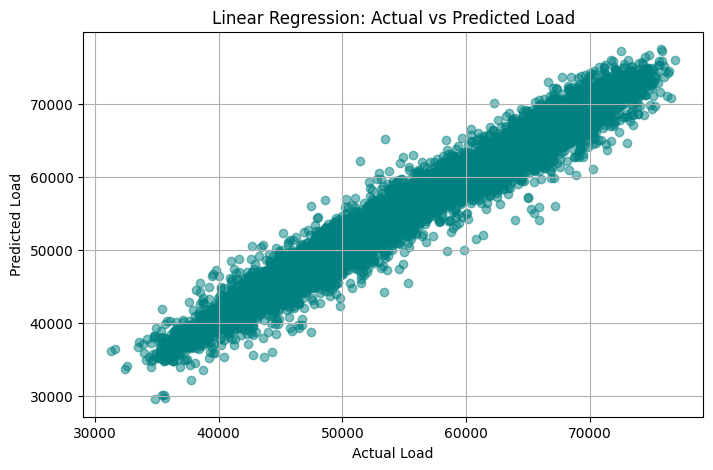

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df_model_clean[['load_forecast']]
y = df_model_clean[['load']]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.xlabel("Actual Load")
plt.ylabel("Predicted Load")
plt.title("Linear Regression: Actual vs Predicted Load")
plt.grid(True)
plt.show()

Multiple Linear Regression 

MSE: 4073926.005174928
R² Score: 0.9594128661903799


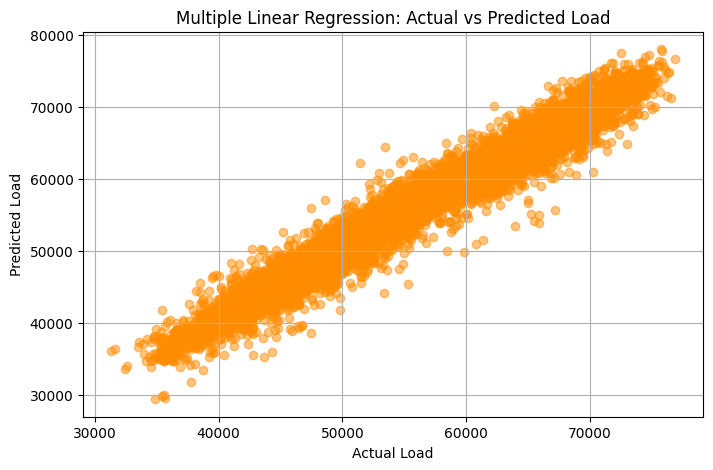

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df_model_clean[["load_forecast", "solar", "wind", "solar_profile"]]
y = df_model_clean["load"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

y_pred_multi = multi_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("R² Score:", r2_score(y_test, y_pred_multi))

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_multi, alpha=0.5, color='darkorange')
plt.xlabel("Actual Load")
plt.ylabel("Predicted Load")
plt.title("Multiple Linear Regression: Actual vs Predicted Load")
plt.grid(True)
plt.show()

Polynomial Regression

Polynomial Regression (Degree 2)
MSE: 4024541.214654262
R² Score: 0.9599048699966533


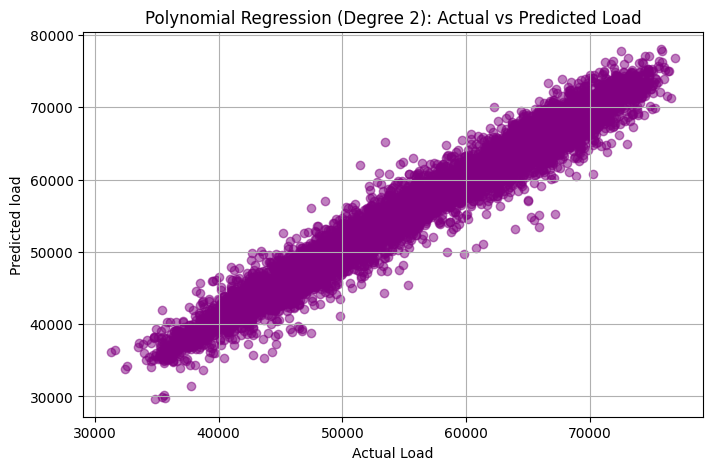

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

poly = PolynomialFeatures(degree= 2, include_bias= False )
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

y_pred_poly = poly_model.predict(X_poly_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test,y_pred_poly)

print("Polynomial Regression (Degree 2)")
print("MSE:",mse_poly)
print("R² Score:",r2_poly)


plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred_poly,alpha=0.5,color='purple')
plt.xlabel("Actual Load")
plt.ylabel("Predicted load")
plt.title("Polynomial Regression (Degree 2): Actual vs Predicted Load")
plt.grid(True)
plt.show()
 

Decision tree Regression

Decision Tree Regression
MSE:7645268.36041786
R2 score:0.9238328016855055


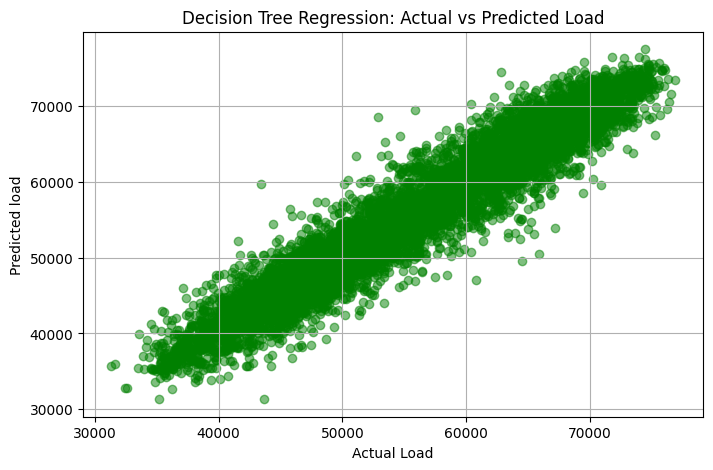

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score    
import matplotlib.pyplot as plt

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree =r2_score(y_test,y_pred_tree)

print("Decision Tree Regression")
print(f"MSE:{mse_tree}")
print(f"R2 score:{r2_tree}")

plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred_tree,alpha=0.5,color='green')
plt.xlabel("Actual Load")
plt.ylabel("Predicted load")
plt.title("Decision Tree Regression: Actual vs Predicted Load")
plt.grid(True)
plt.show()


Random Forest Regression Code

Random Forest Regression
MSE: 4183039.5909612593
R² Score: 0.9583258047903613


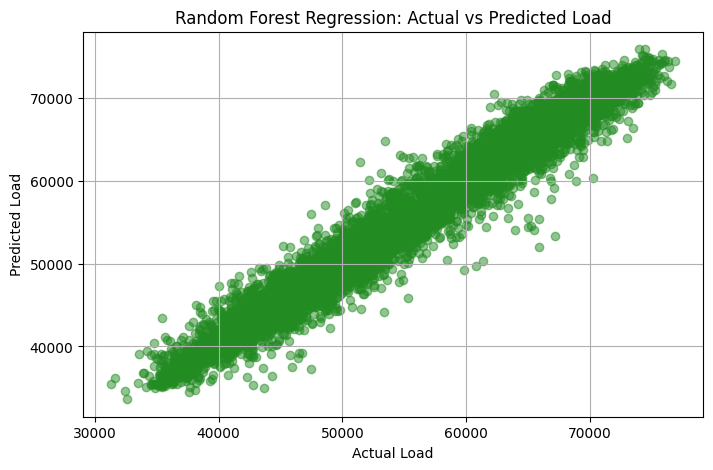

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)

print("Random Forest Regression")
print("MSE:", mse_rf)
print("R² Score:", r2_rf)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='forestgreen')
plt.xlabel("Actual Load")
plt.ylabel("Predicted Load")
plt.title("Random Forest Regression: Actual vs Predicted Load")
plt.grid(True)
plt.show()

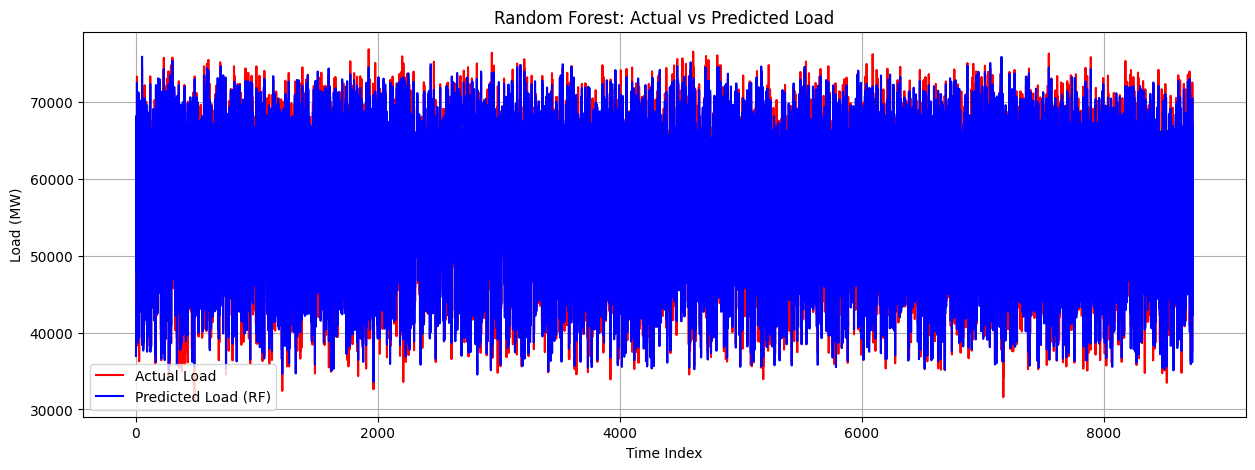

In [31]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='Actual Load', color='red')
plt.plot(y_pred, label='Predicted Load (RF)', color='blue')
plt.title('Random Forest: Actual vs Predicted Load')
plt.xlabel('Time Index')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\megha\AppData\Local\Temp\ipykernel_25520\2514615696.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_feature), max(X_feature), 10).reshape(-1, 1)


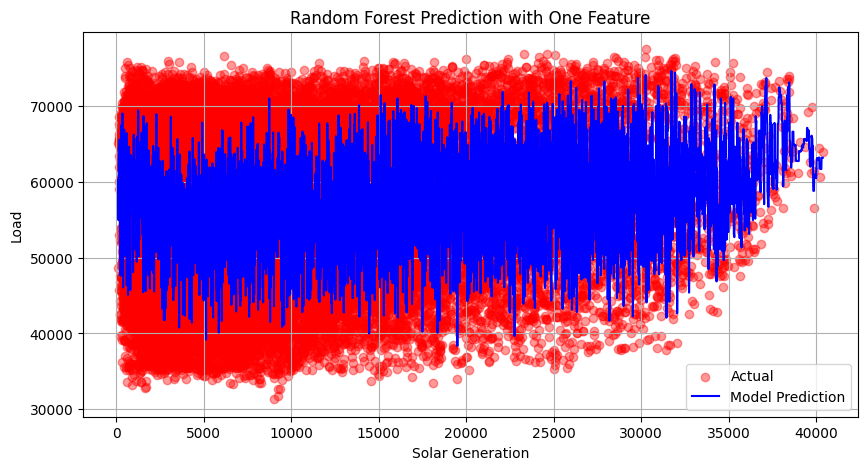

In [32]:
import numpy as np

feature_index = 2  
X_feature = X_train.iloc[:, feature_index].values.reshape(-1, 1)
y_target = y_train.values.ravel()

# Fit model to this single feature
rf_model_single = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_single.fit(X_feature, y_target)

# Generate predictions for plotting
X_grid = np.arange(min(X_feature), max(X_feature), 10).reshape(-1, 1)
y_grid_pred = rf_model_single.predict(X_grid)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(X_feature, y_target, color='red', alpha=0.4, label='Actual')
plt.plot(X_grid, y_grid_pred, color='blue', label='Model Prediction')
plt.xlabel('Solar Generation')
plt.ylabel('Load')
plt.title('Random Forest Prediction with One Feature')
plt.legend()
plt.grid(True)
plt.show()


 Hyperparameter Tuning for Random Forest

tuned Random Forest Regression
MSE: 3883727.5823579654
R2 score: 0.9613077481365528


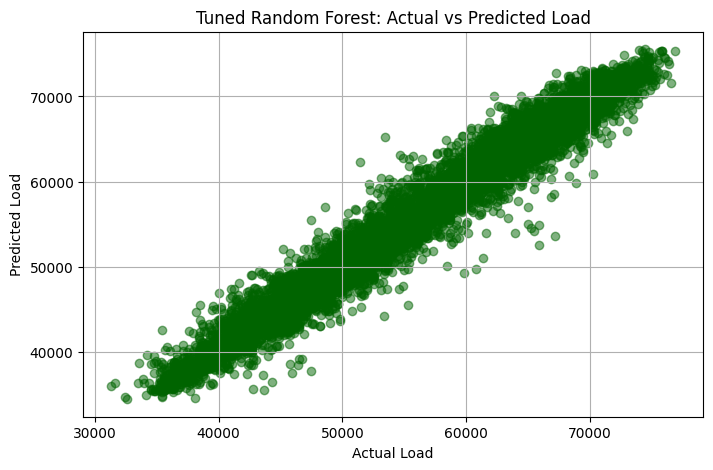

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

rf_tuned = RandomForestRegressor(
    n_estimators= 200,
    max_depth=15,
    min_samples_leaf=5,
    random_state=42
)

rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned=rf_tuned.predict(X_test)

mse_rf_tuned = mean_squared_error(y_test,y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test,y_pred_rf_tuned)

print("tuned Random Forest Regression")
print("MSE:",mse_rf_tuned)
print("R2 score:",r2_rf_tuned)

plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred_rf_tuned,alpha=0.5,color='darkgreen')
plt.xlabel("Actual Load")
plt.ylabel("Predicted Load")
plt.title("Tuned Random Forest: Actual vs Predicted Load")
plt.grid(True)
plt.show()


Gradient Boosting Regression

Gradient Boosting Regression
MSE: 3742050.725302623
R² Score: 0.962719226289992


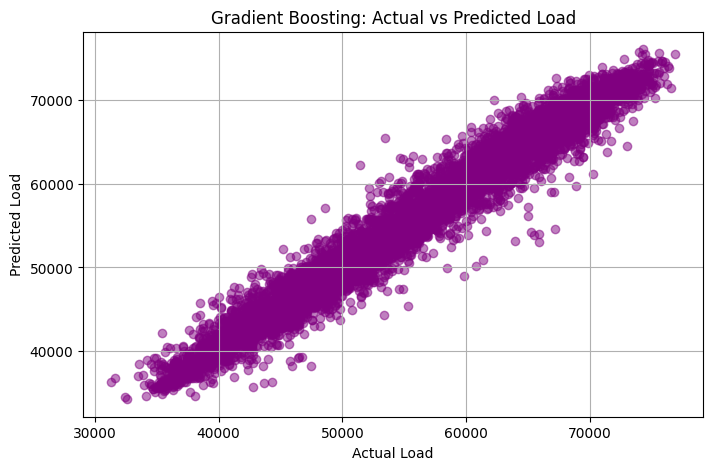

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=5,
    random_state=42
)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression")
print("MSE:", mse_gb)
print("R² Score:", r2_gb)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_gb, alpha=0.5, color='purple')
plt.xlabel("Actual Load")
plt.ylabel("Predicted Load")
plt.title("Gradient Boosting: Actual vs Predicted Load")
plt.grid(True)
plt.show()


comparision of model

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

lr_preds = linear_model.predict(X_test)
dt_preds = decision_tree.predict(X_test) 
rf_preds = random_forest.predict(X_test) 
gb_preds = gradient_boosting.predict(X_test)

comparison_full = pd.DataFrame({
    'Actual Load': y_test,
    'Linear Regression': lr_preds,
    'Decision Tree': dt_preds,
    'Random Forest': rf_preds,
    'Gradient Boosting': gb_preds
}, index=y_test.index)



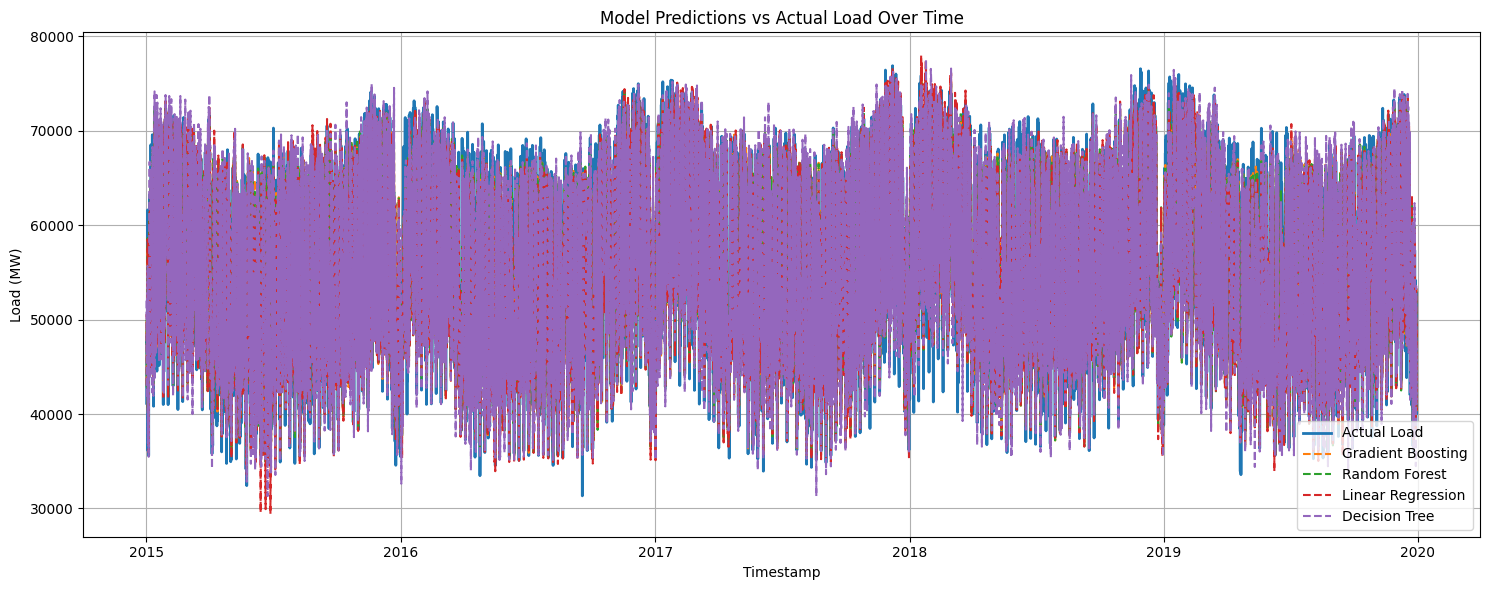

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(comparison_full['Actual Load'], label='Actual Load', linewidth=2)
plt.plot(comparison_full['Gradient Boosting'], label='Gradient Boosting', linestyle='--')
plt.plot(comparison_full['Random Forest'], label='Random Forest', linestyle='--')
plt.plot(comparison_full['Linear Regression'], label='Linear Regression', linestyle='--')
plt.plot(comparison_full['Decision Tree'], label='Decision Tree', linestyle='--')
plt.legend()
plt.title('Model Predictions vs Actual Load Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Load (MW)')
plt.grid(True)
plt.tight_layout()
plt.show()


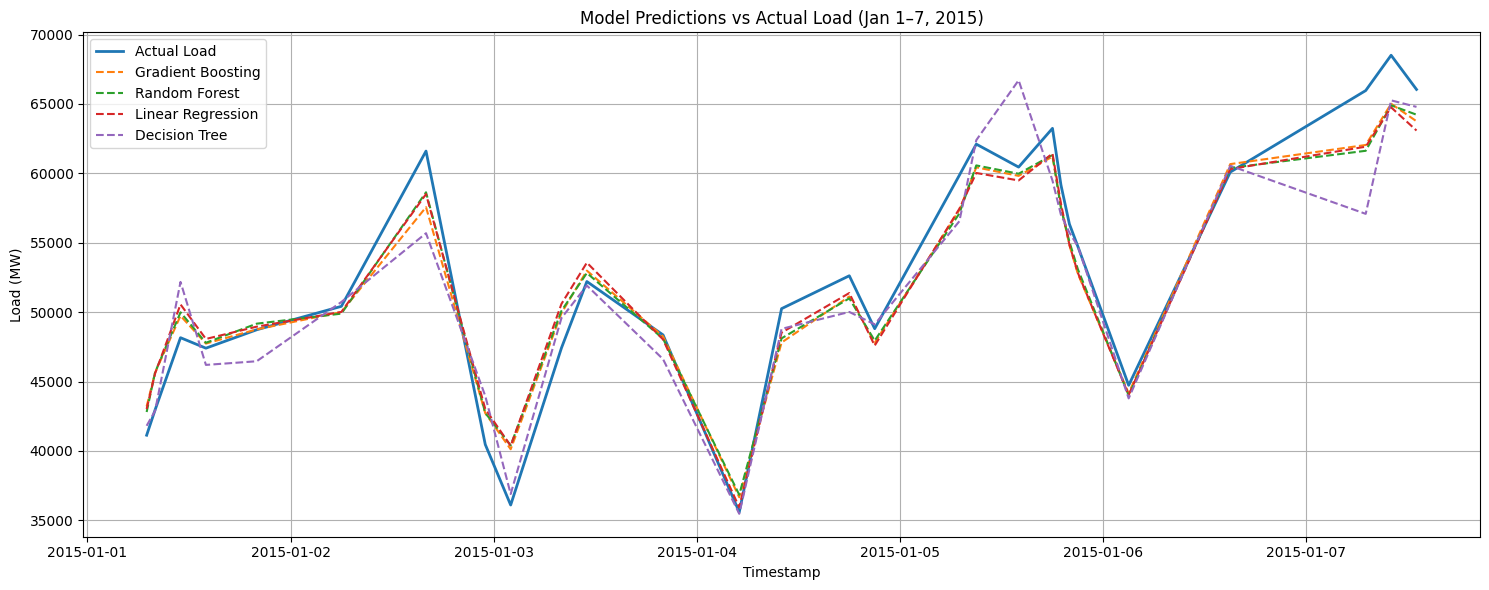

In [47]:
# Slice for a specific range
start = '2015-01-01'
end = '2015-01-07'
comparison_slice = comparison_full.loc[start:end]

# Plot sliced version
plt.figure(figsize=(15, 6))
plt.plot(comparison_slice['Actual Load'], label='Actual Load', linewidth=2)
plt.plot(comparison_slice['Gradient Boosting'], label='Gradient Boosting', linestyle='--')
plt.plot(comparison_slice['Random Forest'], label='Random Forest', linestyle='--')
plt.plot(comparison_slice['Linear Regression'], label='Linear Regression', linestyle='--')
plt.plot(comparison_slice['Decision Tree'], label='Decision Tree', linestyle='--')
plt.legend()
plt.title('Model Predictions vs Actual Load (Jan 1–7, 2015)')
plt.xlabel('Timestamp')
plt.ylabel('Load (MW)')
plt.grid(True)
plt.tight_layout()
plt.show()
